In [1]:
#https://www.math.s.chiba-u.ac.jp/~yasuda/statB/seiki_wa_kei2.pdf
#https://sabopy.com/py/scipy-2-gaussian-fitting/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats,norm
import pystan
%matplotlib inline

In [3]:
#ガウスfitting
from scipy.optimize import curve_fit

def func(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))


def gauss_fit(data, p0):
    hist, bins = np.histogram(data, 40, range=(-3,3))
    bins=bins[:-1]
    plt.plot(bins,hist,alpha=0.5)
    popt, pcov = curve_fit(func, bins, hist, p0=p0) #pcov:共分散
    print("Intensity:",popt[0], " mean:",popt[1],"standard deviation:",popt[2])
    fitting = func(bins, popt[0],popt[1],popt[2])
    plt.plot(bins,fitting,alpha=0.5)
    return(popt)

# param_ini = [80,100,5]
# popt, pcov = curve_fit(func, bins, hist_1, p0=param_ini)
# print(popt)
# [85.43763117 99.90468934  4.60884537]
# fitting = func(bins, popt[0],popt[1],popt[2])

Intensity: 573.8103645964301  mean: -1.0706571831923988 standard deviation: 0.10379343022540355


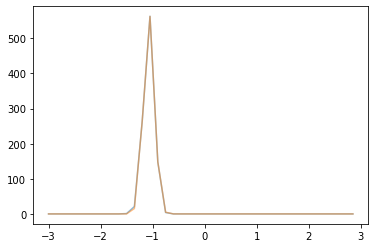

In [4]:
data = np.random.normal(loc=-1, scale=1e-1, size=1000) #ガウシアンノイズを生成
param_ini = [200,-1,1e-1] #強度, 期待値, 標準偏差
popt0 = gauss_fit(data, p0=param_ini)

Intensity: 200.5256753685273  mean: 1.926326900960066 standard deviation: 0.29649530118899875


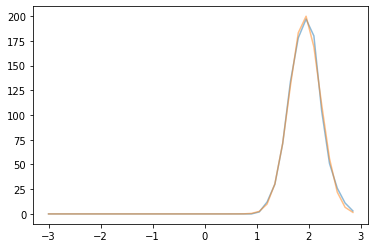

In [5]:
data1 = np.random.normal(loc=2, scale=3e-1, size=1000)
param_ini = [100,1,3e-1] #強度, 期待値, 標準偏差
popt1 = gauss_fit(data1, p0=param_ini)

Intensity: 188.12450391508153  mean: 0.9266135642688702 standard deviation: 0.31864155042303344


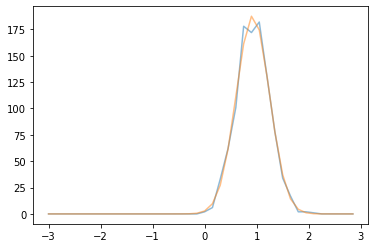

In [6]:
data_sum = data + data1
param_ini = [100,0,1e-1] #強度, 期待値, 標準偏差
popt_sum=gauss_fit(data_sum, p0=param_ini)

In [7]:
print(popt0)
print(popt1)
print(popt_sum)

[ 5.73810365e+02 -1.07065718e+00  1.03793430e-01]
[200.52567537   1.9263269    0.2964953 ]
[188.12450392   0.92661356   0.31864155]


In [8]:
popt0[1] + popt1[1],popt_sum[1],2-1

(0.8556697177676673, 0.9266135642688702, 1)

In [9]:
(popt0[2]**2 + popt1[2]**2)**0.5 ,popt_sum[2],(1e-1**2 + 3e-1**2)**0.5

(0.3141377719808791, 0.31864155042303344, 0.31622776601683794)

In [10]:
#確率密度関数(面積=1)

(-10.0, 10.0)

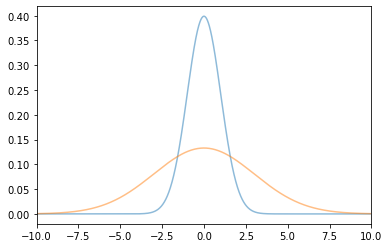

In [11]:
#https://www.sejuku.net/blog/73026
x = np.arange(-10,10,0.01)
#ガウス分布の確率密度関数,平均 0、標準偏差1
y = norm.pdf(x,0,1)
y2 = norm.pdf(x,0,3)

plt.plot(x,y,alpha=0.5)
plt.plot(x,y2,alpha=0.5)
plt.xlim(-10,10)